In [1]:
import numpy as np
import pandas as pda
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import code as cd

In [2]:
housingData = pda.read_csv('Housing_price_data_set.csv')

In [3]:
housingData.drop('Unnamed: 0',axis=1,inplace = True)

In [4]:
housingDataWFS = housingData.copy()

In [5]:
#without feature scaling
trainingSet, testingSet = tts(housingData,test_size=0.3,random_state = 39)

In [6]:
trainingX = trainingSet[housingData.columns[1:4]].copy()
trainingY = trainingSet['price'].copy()
testingX = testingSet[housingData.columns[1:4]].copy()
testingY = testingSet['price'].copy()

In [7]:
trainingX = trainingX.to_numpy()
trainingY = trainingY.to_numpy()
testingX = testingX.to_numpy()
testingY = testingY.to_numpy()

In [8]:
trainingX = np.concatenate([np.ones((trainingX.shape[0] ,1)), trainingX], axis=1)
testingX = np.concatenate([np.ones((testingX.shape[0], 1)), testingX], axis=1)

In [9]:
theta = np.zeros(trainingX.shape[1])

In [10]:
#batch gradient descent algorithm
history,theta = cd.batch_gradient_descent(trainingX,trainingY, theta, 1500, 0.0000000001)

Text(0, 0.5, 'Cost')

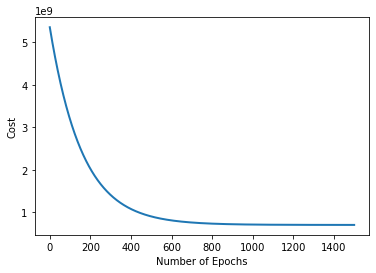

In [11]:
plt.plot(np.arange(len(history)), history, lw=2)
plt.xlabel('Number of Epochs')
plt.ylabel('Cost')

In [12]:
predictedY = testingX.dot(theta)

In [13]:
difference = np.abs(np.subtract(predictedY,testingY))
yoyo = np.divide(difference, testingY)
error = np.multiply(yoyo,100)
print(np.mean(error))
accuracy = 100 - np.mean(error)
print(accuracy)

27.81186883732911
72.18813116267089


In [14]:
theta1 = np.zeros(trainingX.shape[1])

In [15]:
#stochastic gradient descent algorithm
history1,theta1 = cd.stochastic_gradient_descent(trainingX,trainingY, theta1, 150, 0.0000000001)

Text(0, 0.5, 'Cost')

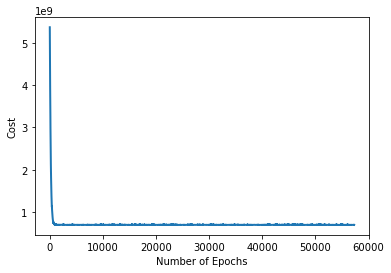

In [16]:
plt.plot(np.arange(len(history1)), history1, lw=2)
plt.xlabel('Number of Epochs')
plt.ylabel('Cost')

In [17]:
predictedY = testingX.dot(theta1)

In [18]:
difference = np.abs(np.subtract(predictedY,testingY))
yoyo = np.divide(difference, testingY)
error = np.multiply(yoyo,100)
print(np.mean(error))
accuracy = 100 - np.mean(error)
print(accuracy)

27.945220880866078
72.05477911913393


In [19]:
theta2 = np.zeros(trainingX.shape[1])

In [20]:
#mini batch gradient descent algorithm
history2,theta2 = cd.mini_batch_gradient_descent(trainingX,trainingY, theta2, 1500, 0.0000000001)

Text(0, 0.5, 'Cost')

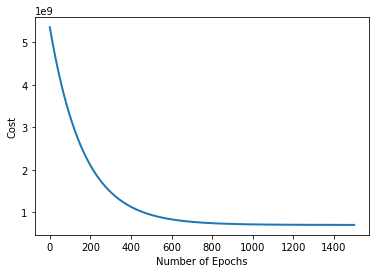

In [21]:
plt.plot(np.arange(len(history2)), history2, lw=2)
plt.xlabel('Number of Epochs')
plt.ylabel('Cost')

In [22]:
predictedY = testingX.dot(theta2)

In [23]:
difference = np.abs(np.subtract(predictedY,testingY))
yoyo = np.divide(difference, testingY)
error = np.multiply(yoyo,100)
print(np.mean(error))
accuracy = 100 - np.mean(error)
print(accuracy)

27.821051731494972
72.17894826850502


In [24]:
#WITH FEATURE SCALING

In [25]:
mu = np.mean(trainingX, axis = 0)
print(mu)

[1.00000000e+00 5.19344241e+03 2.96858639e+00 1.29057592e+00]


In [26]:
stdd =np.std(trainingX,axis = 0)

In [27]:
trainingX[:, 1:] =abs( trainingX[:, 1:] - mu[1:] ) / stdd[1:]

In [28]:
mu = np.mean(testingX, axis = 0)
print(mu)

[1.00000000e+00 5.04969512e+03 2.95731707e+00 1.27439024e+00]


In [29]:
stdd =np.std(testingX,axis = 0)
print(stdd)

[0.00000000e+00 2.27770082e+03 7.18659064e-01 4.97876215e-01]


In [30]:
testingX[:, 1:] =abs( testingX[:, 1:] - mu[1:] ) / stdd[1:]

In [31]:
mu = np.mean(testingY, axis = 0)
print(mu)

67229.5731707317


In [32]:
stdd =np.std(testingY,axis = 0)
print(stdd)

27654.508747871645


In [33]:
testingY =abs(testingY - mu ) / stdd

In [34]:
mu = np.mean(trainingY, axis = 0)
print(mu)

68504.56020942409


In [35]:
stdd =np.std(trainingY,axis = 0)
print(stdd)

26238.619146946767


In [36]:
trainingY =abs(trainingY - mu ) / stdd

In [37]:
theta = np.zeros(trainingX.shape[1])

In [38]:
history,theta = cd.batch_gradient_descent(trainingX,trainingY, theta, 1500, 0.0000000001)

Text(0, 0.5, 'Cost')

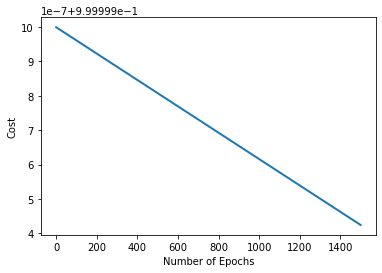

In [39]:
plt.plot(np.arange(len(history)), history, lw=2)
plt.xlabel('Number of Epochs')
plt.ylabel('Cost')

In [40]:
predictedY = testingX.dot(theta)

In [41]:
difference = np.abs(np.subtract(predictedY,testingY))
yoyo = np.divide(difference, testingY)
error = np.multiply(yoyo,100)
print('w0: ', theta[0])
print('w1: ', theta[1])
print('w2: ', theta[2])
print('w3: ', theta[3])
print('Error: ', np.mean(error))
accuracy = 100 - np.mean(error)
print('Accuracy: ', accuracy)

w0:  1.1677321187877227e-07
w1:  9.978806920932797e-08
w2:  8.012606562839202e-08
w3:  1.1461209860131206e-07
Error:  99.9998517065634
Accuracy:  0.0001482934365952815


In [42]:
history1,theta1 = cd.stochastic_gradient_descent(trainingX,trainingY, theta1, 150, 0.0000000001)

Text(0, 0.5, 'Cost')

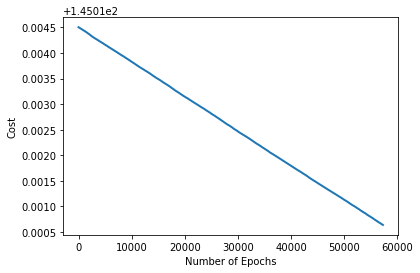

In [43]:
plt.plot(np.arange(len(history1)), history1, lw=2)
plt.xlabel('Number of Epochs')
plt.ylabel('Cost')

In [44]:
predictedY = testingX.dot(theta1)

In [45]:
difference = np.abs(np.subtract(predictedY,testingY))
yoyo = np.divide(difference, testingY)
error = np.multiply(yoyo,100)
print('w0: ', theta[0])
print('w1: ', theta[1])
print('w2: ', theta[2])
print('w3: ', theta[3])
print('Error: ', np.mean(error))
accuracy = 100 - np.mean(error)
print('Accuracy: ', accuracy)

w0:  1.1677321187877227e-07
w1:  9.978806920932797e-08
w2:  8.012606562839202e-08
w3:  1.1461209860131206e-07
Error:  3287.2556696543015
Accuracy:  -3187.2556696543015


In [46]:
history2,theta2 = cd.mini_batch_gradient_descent(trainingX,trainingY, theta2, 1500, 0.0000000001)

Text(0, 0.5, 'Cost')

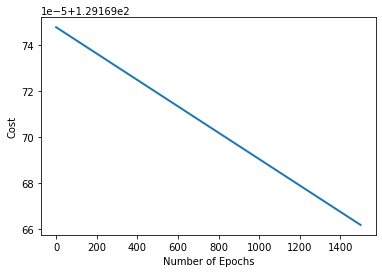

In [47]:
plt.plot(np.arange(len(history2)), history2, lw=2)
plt.xlabel('Number of Epochs')
plt.ylabel('Cost')

In [48]:
predictedY = testingX.dot(theta2)

In [49]:
difference = np.abs(np.subtract(predictedY,testingY))
yoyo = np.divide(difference, testingY)
error = np.multiply(yoyo,100)
print('w0: ', theta[0])
print('w1: ', theta[1])
print('w2: ', theta[2])
print('w3: ', theta[3])
print('Error: ', np.mean(error))
accuracy = 100 - np.mean(error)
print('Accuracy: ', accuracy)

w0:  1.1677321187877227e-07
w1:  9.978806920932797e-08
w2:  8.012606562839202e-08
w3:  1.1461209860131206e-07
Error:  3073.063358628384
Accuracy:  -2973.063358628384
